In [1]:
import requests
from datetime import datetime as dt
import time
import json
import matplotlib.image as mpimg
from io import BytesIO
import matplotlib.pyplot as plt

### Init

In [2]:
server_address = 'http://192.168.1.11:10000'

### Wait for server be ready

In [3]:
print(dt.now(), 'waiting for server..')
r = ''
while r == '':
    try:
        r = requests.get(server_address+'/test').text
    except Exception as e:
        time.sleep(1)
print(r)
print(dt.now(), 'server is ready')

2022-08-10 00:30:02.491942 waiting for server..
get ok
2022-08-10 00:30:02.497732 server is ready


### Prompt & Request

In [4]:
# prompt & request
prompts = [
            {
                'prompt': 'Cyberpunk city. Pastel painting',
                'predictions_count': 3,
                'upscale_ratio': 4
            },
            {
                'prompt': 'Nyan cat. Crayon art',
                'predictions_count': 2,
                'upscale_ratio': 8
            }
]
# request
request_str = json.dumps(prompts)
response = requests.post(server_address+'/request', json=request_str)
if response.status_code==200:
    # print(response.text)
    prompts_requested = json.loads(response.text)    
else:
    print(response.status_code)
    print(response.text)

### Receiving result

2022-08-10 00:30:02.524346 Waiting..


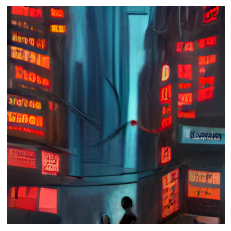

(1024, 1024, 3) saved: 2022-08-10 00:30:26.001883_[Cyberpunk city. Pastel painting]_4_0.png 



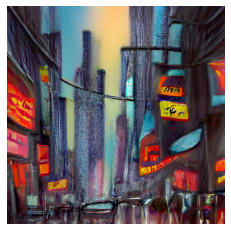

(1024, 1024, 3) saved: 2022-08-10 00:30:46.458449_[Cyberpunk city. Pastel painting]_4_1.png 



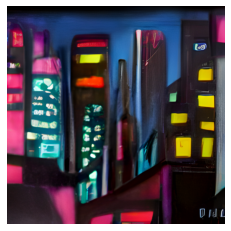

(1024, 1024, 3) saved: 2022-08-10 00:31:05.877541_[Cyberpunk city. Pastel painting]_4_2.png 



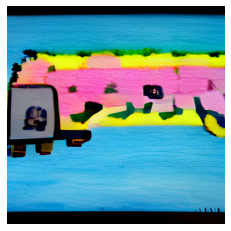

(2048, 2048, 3) saved: 2022-08-10 00:31:26.799102_[Nyan cat. Crayon art]_8_0.png 



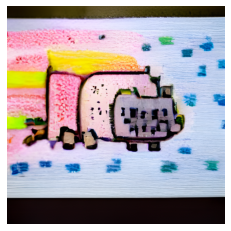

(2048, 2048, 3) saved: 2022-08-10 00:31:46.714802_[Nyan cat. Crayon art]_8_1.png 


 2022-08-10 00:31:46.718081 Done!


In [5]:
print(dt.now(), 'Waiting..')
# Read results
for prompt in prompts_requested:
    request_str = json.dumps(prompt['filename'])
    for i in range(int(prompt['predictions_count'])):
        waiting = True
        while waiting:
            response = requests.post(server_address+'/result', json=request_str)
            if response.headers['Content-Type'] == 'image/png':
                waiting = False
                try:
                    # Convert response.content to image
                    img = mpimg.imread(BytesIO(response.content))
                    # Get image size
                    img_size = img.shape
                    # Show in original size
                    # inch_factor = 55.76171875
                    # plt.figure(figsize=(img_size[1]/inch_factor, img_size[0]/inch_factor))
                    plt.imshow(img)
                    # Remove borders
                    plt.axis('off')
                    plt.show()
                except Exception as e:
                    print('Unable to show', str(e))
                # Save to file
                filename = str(dt.now())
                filename += '_['+str(prompt['prompt'])+']_'
                filename += str(prompt['upscale_ratio'])
                filename += '_'+str(i)+'.png'
                with open(filename, 'wb') as f:
                    f.write(response.content)
                    print(img_size, 'saved:', filename, '\n')
            else:
                time.sleep(1)
print('\n', dt.now(), 'Done!')